## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Colab Notebooks/Dataset/train'
valid_path = '/content/drive/My Drive/Colab Notebooks/Dataset/test'



In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94781440/94765736 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/drive/My Drive/Colab Notebooks/Dataset/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [15]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

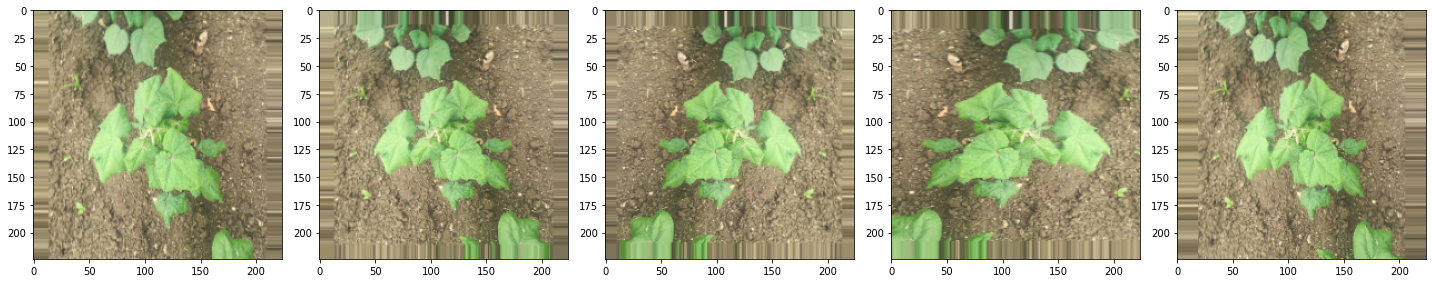

In [16]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=80,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/80
61/61 [==============================] - 553s 9s/step - loss: 2.4802 - accuracy: 0.4218 - val_loss: 1.2460 - val_accuracy: 0.4444
Epoch 2/80
61/61 [==============================] - 43s 707ms/step - loss: 1.1723 - accuracy: 0.5495 - val_loss: 1.2055 - val_accuracy: 0.6111
Epoch 3/80
61/61 [==============================] - 43s 708ms/step - loss: 0.9127 - accuracy: 0.6433 - val_loss: 0.8606 - val_accuracy: 0.6111
Epoch 4/80
61/61 [==============================] - 43s 708ms/step - loss: 0.8639 - accuracy: 0.6668 - val_loss: 0.7989 - val_accuracy: 0.6111
Epoch 5/80
61/61 [==============================] - 43s 701ms/step - loss: 0.8272 - accuracy: 0.6591 - val_loss: 0.6590 - val_accuracy: 0.7222
Epoch 6/80
61/61 [==============================] - 43s 702ms/step - loss: 0.7705 - accuracy: 0.7007 - val_loss: 0.6111 - val_accuracy: 0.7778
Epoch 7/80
61/61 [==============================] - 42s 696ms/step - loss: 0.7683 - accuracy: 0.6945 - val_loss: 0.6728 - val_accuracy: 0.7778
E

In [18]:
import matplotlib.pyplot as plt

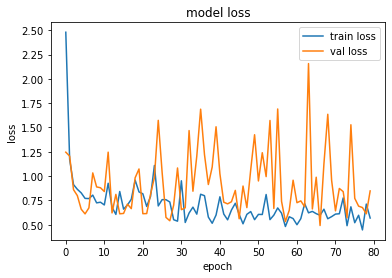

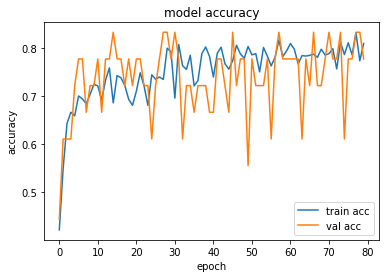

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from tensorflow.keras.models import load_model

In [21]:
# save it as a h5 file




#model.save('/content/drive/My Drive/Colab Notebooks/Dataset/model_resnet50.h5')

In [22]:

y_pred = model.predict(test_set)


In [23]:
y_pred

array([[5.2283285e-03, 9.8324090e-01, 1.1045362e-03, 1.0426235e-02],
       [1.5347154e-06, 2.6344385e-06, 9.9992502e-01, 7.0844733e-05],
       [1.0545639e-04, 1.6663561e-02, 3.5171965e-04, 9.8287922e-01],
       [1.1441141e-05, 6.0217030e-02, 8.7690278e-05, 9.3968379e-01],
       [2.5369680e-05, 2.4713725e-06, 9.9997056e-01, 1.5560938e-06],
       [9.9792576e-01, 1.8282746e-05, 6.6291095e-06, 2.0492428e-03],
       [1.6774032e-03, 1.9278698e-02, 9.7034562e-01, 8.6982837e-03],
       [9.6090436e-02, 8.7538201e-01, 1.4121266e-05, 2.8513465e-02],
       [5.2631147e-08, 1.2330012e-04, 6.3206520e-09, 9.9987662e-01],
       [1.6819574e-06, 9.9435306e-01, 8.3203400e-09, 5.6452164e-03],
       [3.7778761e-07, 9.9722302e-01, 7.4563677e-06, 2.7692039e-03],
       [7.0269583e-05, 2.9390787e-03, 9.8750532e-01, 9.4853221e-03],
       [1.4159170e-06, 1.3483636e-01, 1.6377571e-05, 8.6514586e-01],
       [2.7126159e-06, 2.3222460e-01, 5.7386693e-05, 7.6771533e-01],
       [9.8731857e-07, 9.9628168e-

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([1, 2, 3, 3, 2, 0, 2, 1, 3, 1, 1, 2, 3, 3, 1, 1, 1, 2])

In [27]:
accuracy = r.history["accuracy"][-1]
val_accuracy = r.history["val_accuracy"][-1]
loss = r.history["loss"][-1]
val_loss = r.history["val_loss"][-1]

In [28]:
print("Accuracy of model: {}".format(val_accuracy) )
print("Loss of model: {}".format(val_loss) )

Accuracy of model: 0.7777777910232544
Loss of model: 0.8472550511360168
